# Machine Learning Workshop -- Convolutional Neural Network (CNN)

## Installing and loading some needed packages

In [1]:
# Needed package for plotting
import matplotlib.pyplot as plt
%matplotlib inline 

# Needed package for builing the convolutional neural network
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from tensorflow.keras.utils import plot_model

# Needed package for computer vision problems
import cv2

# Needed package for getting the current working directory
import os

/Users/soheilsaghafi/opt/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


## Loading the MNIST data from keras library and split that into train and test dataset

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
image_index = 0
print('The number for index = ' + str(image_index) + ' is ' + str(y_train[image_index])) 

The number for index = 0 is 5


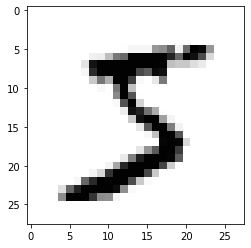

In [3]:
plt.imshow(x_train[image_index], cmap='Greys')

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
x_train[image_index].shape

(28, 28)

## Normalize data and put them into the correct format

In [6]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


## Convolutional Neural Network (CNN) structure

In [7]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) 
model.add(Dense(256, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               205056    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0

## Training the CNN

In [9]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.3151 - accuracy: 0.9052
Epoch 2/5
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0504 - accuracy: 0.9846
Epoch 3/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0353 - accuracy: 0.9883
Epoch 4/5
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0259 - accuracy: 0.9919
Epoch 5/5
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0217 - accuracy: 0.9927


In [10]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0302 - accuracy: 0.9894


[0.03016544133424759, 0.9894000291824341]

 For image_index = 59 CNN predicted number = 5


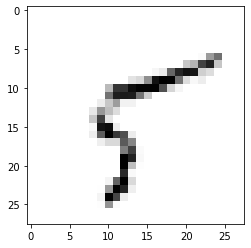

In [32]:
image_index = 59
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(' For image_index = ' + str(image_index) + ' CNN predicted number = ' + str(pred.argmax()))

# In this part we are going to take a picture of your own handwriting and pass it into the CNN model, for doing that we need to do the following steps:

## 1. Write a number in 6 different ways on a paper and transfer the picture into the same directory that your Jupyter Notebook is

In [38]:
cwd = os.getcwd()
print('current working directory is = ' + cwd)

current working directory is = /Volumes/GoogleDrive/My Drive/All_Research/Machine_Learning_Seminars_2022


In [39]:
file = r'/Volumes/GoogleDrive/My Drive/All_Research/Machine_Learning_Seminars_2022/original_image.jpeg'
test_image_original = cv2.imread(file, cv2.IMREAD_GRAYSCALE)

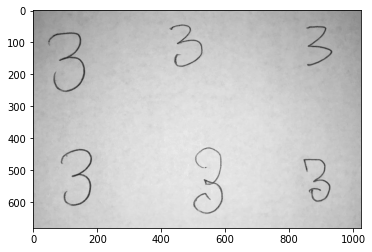

In [41]:
plt.imshow(test_image_original, cmap = 'gray')

## 2. Take a picture of each of them individually -- you can have only one picture and then crop it into 6 different pieces

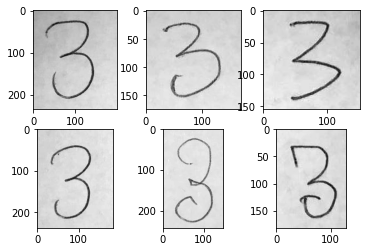

In [42]:
fig, axs = plt.subplots(2, 3)


counter = 1
for row_number in range(0, 2):
    for col_number in range(0,3):
        
        file = r'/Volumes/GoogleDrive/My Drive/All_Research/Machine_Learning_Seminars_2022/copy_' + str(counter) +'.jpeg'
        copy_image = cv2.imread(file, cv2.IMREAD_GRAYSCALE)
        axs[row_number, col_number].imshow(copy_image, cmap = 'gray')
        counter = counter + 1
        

    

## 4. Change the format of the picture into a readable form for your CNN model

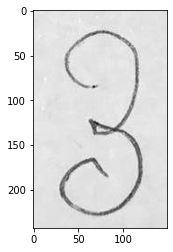

In [46]:
file = r'/Volumes/GoogleDrive/My Drive/All_Research/Machine_Learning_Seminars_2022/copy_5.jpeg'
copy_1 = cv2.imread(file, cv2.IMREAD_GRAYSCALE)
plt.imshow(copy_1, cmap = 'gray')

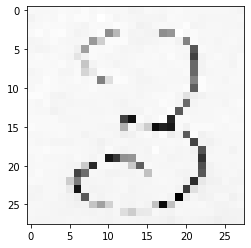

In [47]:
# copy_1_resized = cv2.resize(copy_1, (28, 28), interpolation = cv2.INTER_LINEAR)
copy_1_resized = cv2.resize(copy_1, (28, 28))
copy_1_resized = cv2.bitwise_not(copy_1_resized)

plt.imshow(copy_1_resized, cmap = 'Greys')

In [48]:
pred = model.predict(copy_1_resized.reshape(1, 28, 28, 1))
print('CNN predicted number = ' + str(pred.argmax()))

CNN predicted number = 8
